**Статистический анализ данных**

**Исследование сервиса аренды самокатов GoFast**
<br>
<br>
Нам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. 
<br>
<br>
**Цель исследования:**
<br>
1)Проанализировать данные
<br>
2)Проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
<br>
<br>
**Ход исследования:**
<br>
Данные о пользователях я получу из файла "/datasets/users_go.csv", данные о поездках я получу из файла "/datasets/rides_go.csv", данные о подписках я получу из файла "/datasets/rides_go.csv". О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.
<br>
<br>
Я проверю данные на пропуски и дубликаты. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, создам дополнительные таблицы для удобства, и приступлю к проведению исследовательского анализа.
<br>
<br>
Таким образом, моё исследование пройдёт в семь этапов:
<br>
<br>
1)Загрузка и обзор данных.
<br>
2)Предобработка данных.
<br>
3)Анализ данных определенных данных из таблицы.
<br>
4)Объединение всех таблиц в одну, для дальнейшего удобства.
<br>
5)Подсчёт выручки.
<br>
6)Проверка определенных гипотез.
<br>
7)Написание общего вывода.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
data_users = pd.read_csv("/datasets/users_go.csv")
data_rides = pd.read_csv("/datasets/rides_go.csv")
data_subscription = pd.read_csv("/datasets/subscriptions_go.csv")

In [3]:
data_users

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


In [4]:
data_users.describe()

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


In [5]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [6]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [7]:
len(data_users[data_users.duplicated()])

31

В таблице с пользователями максимальное, минимальное и средние значения возраста выгядят реалистичными, типы данных в порядке, пропусков нет,  имеются полные дубликаты, далее обратим на них внимание.

In [8]:
data_rides

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


In [9]:
data_rides.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


In [10]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [11]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [12]:
len(data_rides[data_rides.duplicated()])

0

В таблице с поездками максимальное и средние значения во всех столбцах выгядят реалистичными,к минимальным значениям есть вопросы, типы данных в порядке, пропусков нет, полных дубликатов нет.

In [13]:
data_subscription

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Здесь все впорядке

#### Шаг 2. Предобработка данных

In [14]:
data_rides["date"] = pd.to_datetime(data_rides["date"] , format = "%Y-%m-%d")

In [15]:
ma = -1
mi = 3000
for item in data_rides["date"]:
    ma = max(ma , item.year)
    mi = min(mi , item.year)
print("min: " , ma , "max: " , mi)
    

min:  2021 max:  2021


**Исследования только за 2021 год**

In [16]:
data_rides["month"] = data_rides["date"].apply(lambda x: x.month)

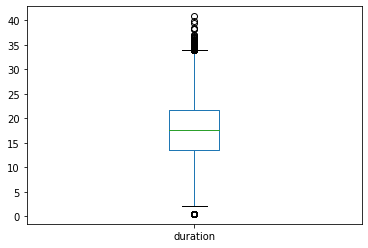

In [17]:
data_rides["duration"].plot(kind = "box");

Есть анамалии в виде слишком коротких поездок, возможно это связано с тем, что пользователи не могут поехать на самокате из-за технических неполадок.

In [18]:
data_rides['date'].dt.year.unique()

array([2021])

In [19]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [20]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [21]:
print(len(data_users[data_users.duplicated()]))
data_users = data_users.drop_duplicates()
print(len(data_users[data_users.duplicated()]))
data_users = data_users.reset_index(drop = True)

31
0


In [22]:
len(data_rides[data_rides.duplicated()])

0

In [23]:
len(data_subscription[data_subscription.duplicated()])

0

**Вывод**
<br>
Во всех датафреймах нет пропущенных значений
<br>
Все дубликаты в таблице с поездками были удалены, в других таблицах полных дубликатов нет


#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

In [24]:
data_users.groupby("city").count()["user_id"].sort_values(ascending=False)

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: user_id, dtype: int64

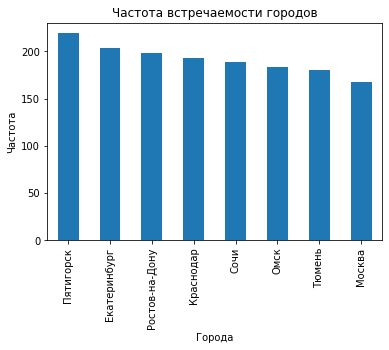

In [25]:
data_users.groupby("city").count()["user_id"].sort_values(ascending=False).plot(kind = "bar");
plt.title("Частота встречаемости городов");
plt.xlabel("Города");
plt.ylabel("Частота");


Больше всего пользователей из Пятигорска
<br>
Меньше всего пользователей из Москвы

##### Соотношение пользователей с подпиской и без подписки

In [26]:
data_users.groupby("subscription_type").count()["user_id"]

subscription_type
free     835
ultra    699
Name: user_id, dtype: int64

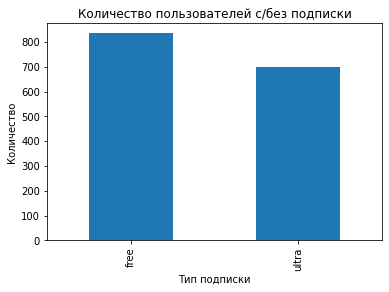

In [27]:
data_users.groupby("subscription_type").count()["user_id"].plot(kind = "bar");
plt.title("Количество пользователей с/без подписки");
plt.xlabel("Тип подписки");
plt.ylabel("Количество");

In [28]:
tmp = data_users.groupby("subscription_type").count()["user_id"].reset_index().copy()
print(tmp)
print("Процент пользователей с подпиской:" , round(tmp.at[1 , "user_id"] / (tmp.at[1 , "user_id"] + tmp.at[0 , "user_id"])* 100) , "%")
print("Процент пользователей без подписки:" , round(tmp.at[0 , "user_id"] / (tmp.at[1 , "user_id"] + tmp.at[0 , "user_id"])* 100), "%")

  subscription_type  user_id
0              free      835
1             ultra      699
Процент пользователей с подпиской: 46 %
Процент пользователей без подписки: 54 %


Пользователей без подписки немного больше

##### Возраст пользователей

In [29]:
data_users["age"].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

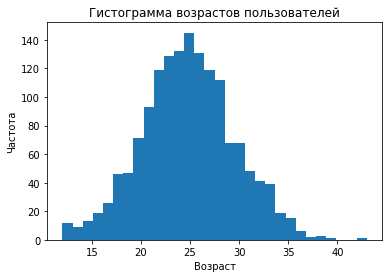

In [30]:
data_users["age"].plot(kind = "hist" , bins = 30);
plt.title("Гистограмма возрастов пользователей");
plt.xlabel("Возраст");
plt.ylabel("Частота");

График похож на нормальное распределение
<br>
Среднее значение возраста пользователей - 25 лет
<br>
Минимальное значение возраста пользователей - 12 лет
<br>
Максимальное значение возраста пользователей - 43 лет

##### Расстояние, которое пользователь преодолел за одну поездку

In [31]:
data_rides["distance"].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

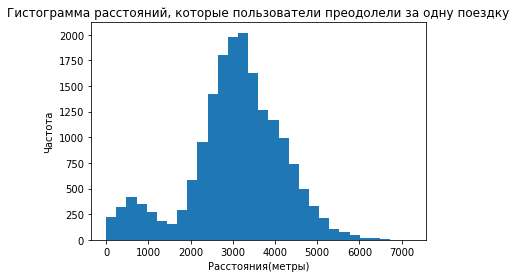

In [32]:
data_rides["distance"].plot(kind = "hist" , bins = 30);
plt.title("Гистограмма расстояний, которые пользователи преодолели за одну поездку");
plt.xlabel("Расстояния(метры)");
plt.ylabel("Частота");

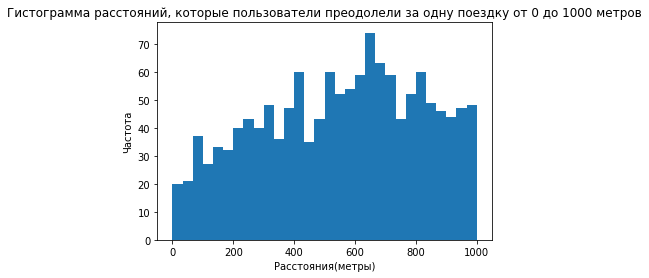

In [33]:
data_rides["distance"].plot(kind = "hist" , bins = 30 , range = (0,1000));
plt.title("Гистограмма расстояний, которые пользователи преодолели за одну поездку от 0 до 1000 метров");
plt.xlabel("Расстояния(метры)");
plt.ylabel("Частота");


График имеет второй купол в районе 500 метров, можно предположить, что это связано с тем, что пользователям не нравятся определенные самокаты(например с какими-либо неисправностями) и они быстро завершают аренду, чтобы взять другой самокат или же столь короткие поездки популярны среди пользователей.
<br>
<br>
Среднее значение дистанции пользователей - 3070 меров
<br>
Минимальное значение дистанции пользователей - 1 метр (возможно не получилось поехать)
<br>
Максимальное значение дистанции пользователей - 7211 метров

##### Продолжительность поездок

In [34]:
data_rides["duration"].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

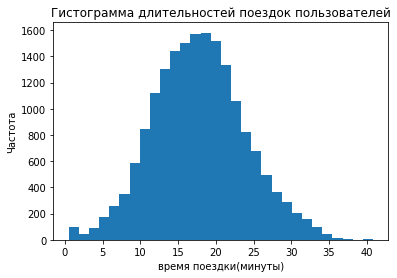

In [35]:
data_rides["duration"].plot(kind = "hist" , bins = 30);
plt.title("Гистограмма длительностей поездок пользователей");
plt.xlabel("время поездки(минуты)");
plt.ylabel("Частота");

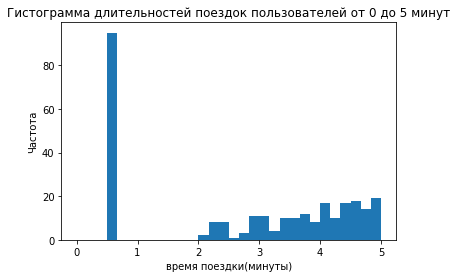

In [36]:
data_rides["duration"].plot(kind = "hist" , bins = 30 , range = (0 , 5));
plt.title("Гистограмма длительностей поездок пользователей от 0 до 5 минут");
plt.xlabel("время поездки(минуты)");
plt.ylabel("Частота");

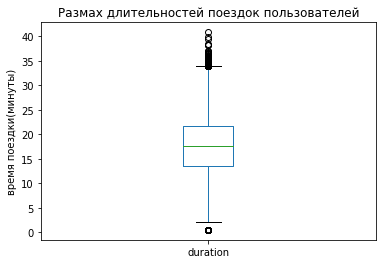

In [37]:
data_rides["duration"].plot(kind = "box");
plt.title("Размах длительностей поездок пользователей");
plt.ylabel("время поездки(минуты)");


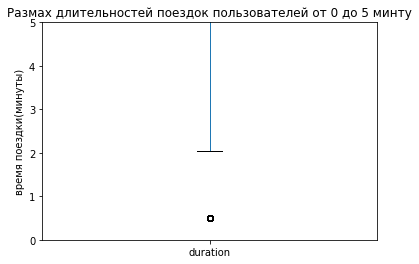

In [38]:
data_rides["duration"].plot(kind = "box");
plt.title("Размах длительностей поездок пользователей от 0 до 5 минту");
plt.ylabel("время поездки(минуты)");
plt.ylim(0,5);

В целом график похож на нормальное распределение, но имеется значительный выьрос в районе 0.5 минуты, возможно это связано с тем, что пользователи не могут поехать на самокате из-за технических неполадок
<br>
<br>
Среднее значение времени пользователей - 18 меров
<br>
Минимальное значение времени пользователей - 0.5 минуты
<br>
Максимальное значение времени пользователей - 41 минута

#### Шаг 4. Объединение данных

##### Таблица со всеми данными

In [39]:
data_users

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


In [40]:
data_users.shape[0]

1534

In [41]:
data_rides

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


In [42]:
data_rides.shape[0]

18068

In [43]:
data_subscription

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [44]:
data_subscription.shape[0]

2

In [45]:
data_all = data_rides.merge(data_users)

In [46]:
data_all = data_all.merge(data_subscription)

In [47]:
data_all.shape[0]

18068

In [48]:
if data_all.shape[0] == data_rides.shape[0]:
    print("Размерности таблиц совпадают")
else:
    print("Размерности таблиц не совпадают")

Размерности таблиц совпадают


In [49]:
data_all

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


##### Таблица c данными о пользователях без подписки и с данными о пользователях с подпиской.


С данными о пользователях без подписки

In [50]:
data_free = data_all.loc[data_all["subscription_type"] == "free"].copy()

C данными о пользователях с подпиской

In [51]:
data_ultra = data_all.loc[data_all["subscription_type"] == "ultra"].copy()

##### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий.


Расстояние

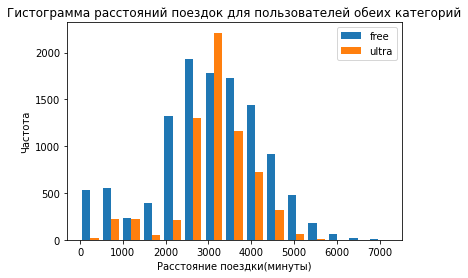

In [52]:
plt.hist([data_free["distance"] , data_ultra["distance"]] , label = ["free" , "ultra"] , bins = 15)
plt.legend(loc='upper right')
plt.title("Гистограмма расстояний поездок для пользователей обеих категорий");
plt.xlabel("Расстояние поездки(минуты)");
plt.ylabel("Частота");
plt.show()

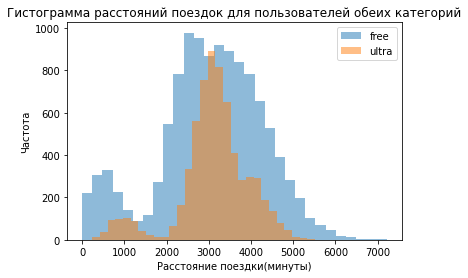

In [53]:
plt.hist(data_free["distance"], alpha=0.5, label='free' , bins = 30)
plt.hist(data_ultra["distance"], alpha=0.5, label='ultra' , bins = 30)
plt.legend(loc='upper right')
plt.title("Гистограмма расстояний поездок для пользователей обеих категорий");
plt.xlabel("Расстояние поездки(минуты)");
plt.ylabel("Частота");
plt.show()
plt.show()

**Вывод:** Видно, что в целом пользователи без подписки совершают больше поездок, и значительно больше совершают поездки на короткие дистанции, Для бесплатного тарифа проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км. Для платного тарифа: Пик расстояния приходится на 3км.

Время поездки

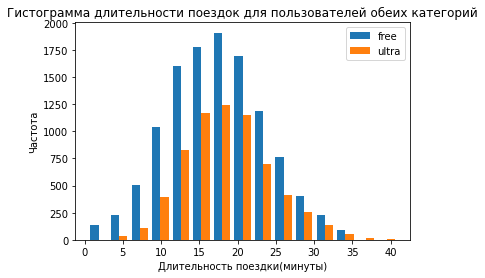

In [54]:
plt.hist([data_free["duration"] , data_ultra["duration"]] , label = ["free" , "ultra"] , bins = 15)
plt.legend(loc='upper right')
plt.title("Гистограмма длительности поездок для пользователей обеих категорий");
plt.xlabel("Длительность поездки(минуты)");
plt.ylabel("Частота");
plt.show()


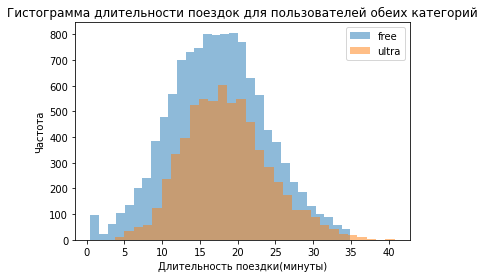

In [55]:
plt.hist(data_free["duration"], alpha=0.5, label='free' , bins = 30)
plt.hist(data_ultra["duration"], alpha=0.5, label='ultra' , bins = 30)
plt.legend(loc='upper right')
plt.title("Гистограмма длительности поездок для пользователей обеих категорий");
plt.xlabel("Длительность поездки(минуты)");
plt.ylabel("Частота");
plt.show()

**Вывод:** Пользователи без подписки совершают больше поездок, также можно выделить выброс у пользователей без подписки в районе 0.5 минут. Для бесплатного тарифа время поездки составляет от 10 до 30 минут. Для платного тарифа: в основном время укладывается в промежуток от 15 до 25 минут.

#### Шаг 5. Подсчёт выручки

##### Cуммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [56]:
# data_pivot = data_all.groupby("user_id").agg(["count" , "sum"])[["distance" , "duration"]]["distance"].copy()
# data_pivot = data_pivot.reset_index()
# tmp =  data_all.groupby("user_id").agg(["count" , "sum"])[["distance" , "duration"]]["duration"]["sum"].reset_index().copy()
# tmp.rename(columns = {'sum':'duration_sum'}, inplace = True )
# data_pivot = data_pivot.merge(tmp)
# data_pivot.rename(columns = {'sum':'distance_sum'}, inplace = True )
# data_pivot["distance_sum"] = data_pivot["distance_sum"].apply(lambda x: np.ceil(x))
# data_pivot["duration_sum"] = data_pivot["duration_sum"].apply(lambda x: np.ceil(x))
# data_pivot


In [57]:
data_pivo = data_all.groupby(["month" , "user_id"]).agg(["count" , "sum"])[["distance" , "duration"]]["distance"].reset_index()
data_pivo.rename(columns = {'sum':'distance_sum'}, inplace = True )
tmp = data_all.groupby(["month" , "user_id"]).agg(["count" , "sum"])[["distance" , "duration"]]["duration"].reset_index()
data_pivo = data_pivo.merge(tmp)
data_pivo.rename(columns = {'sum':'duration_sum'}, inplace = True )
data_pivo["distance_sum"] = data_pivo["distance_sum"].apply(lambda x: round(x , 1))
data_pivo["duration_sum"] = data_pivo["duration_sum"].apply(lambda x: np.ceil(x))
data_pivo.head(20)


,month,user_id,count,distance_sum,duration_sum
0,1,1,2,7027.5,42.0
1,1,3,1,3061.8,13.0
2,1,5,1,3914.6,13.0
3,1,7,2,6478.1,28.0
4,1,12,1,3577.2,33.0
5,1,13,2,6688.0,42.0
6,1,14,2,7699.6,34.0
7,1,15,1,4187.6,39.0
8,1,20,1,3516.7,29.0
9,1,22,1,3058.7,13.0


##### Помесячная выручка, которую принёс каждый пользователь

In [58]:
data_pivo = data_pivo.merge(data_users)
data_pivot = data_pivo[["month" , "user_id" ,"count" , "distance_sum" , "duration_sum" , "subscription_type"]]
data_pivot

,month,user_id,count,distance_sum,duration_sum,subscription_type
0,1,1,2,7027.5,42.0,ultra
1,4,1,1,754.2,7.0,ultra
2,8,1,2,6723.5,45.0,ultra
3,10,1,2,5809.9,32.0,ultra
4,11,1,3,7003.5,54.0,ultra
...,...,...,...,...,...,...
11326,11,1348,2,6622.8,38.0,free
11327,12,1348,2,6308.8,40.0,free
11328,9,636,1,1159.9,13.0,ultra
11329,10,636,3,8885.2,71.0,ultra


In [59]:
data_pivot.isna().sum()

month                0
user_id              0
count                0
distance_sum         0
duration_sum         0
subscription_type    0
dtype: int64

In [60]:
def salary(items):
    res = 0
    if items["subscription_type"] == "free":
        res += 50 * items["count"]
        res += 8 * items["duration_sum"]
        return res
    if items["subscription_type"] == "ultra":
        res += 199
        res += 6 * items["duration_sum"]
        return res 

    


data_pivot = data_pivot.copy()  
data_pivot.loc[:, "money"] = data_pivot.apply(salary, axis=1)

data_pivot


,month,user_id,count,distance_sum,duration_sum,subscription_type,money
0,1,1,2,7027.5,42.0,ultra,451.0
1,4,1,1,754.2,7.0,ultra,241.0
2,8,1,2,6723.5,45.0,ultra,469.0
3,10,1,2,5809.9,32.0,ultra,391.0
4,11,1,3,7003.5,54.0,ultra,523.0
...,...,...,...,...,...,...,...
11326,11,1348,2,6622.8,38.0,free,404.0
11327,12,1348,2,6308.8,40.0,free,420.0
11328,9,636,1,1159.9,13.0,ultra,277.0
11329,10,636,3,8885.2,71.0,ultra,625.0


#### Шаг 6. Проверка гипотез

##### Пользователи с подпиской могут быть «выгоднее» для компании

Обозначим настоящую среднюю времени на поездки пользователей без подписки как μ1, пользователей с подпиской как μ2 тогда<br>
Но: μ1 = μ2
<br>
H1: μ2 > μ1
<br>
alpha = 0.05


In [61]:
data_all["duration"] = data_all["duration"].apply(lambda x: np.ceil(x))
for item in data_all["city"].unique():
    print("-----",item,"-----")
    x = data_all.loc[(data_all["city"] == item) & (data_all["subscription_type"] == "free") , "duration"]
    y = data_all.loc[(data_all["city"] == item) & (data_all["subscription_type"] == "ultra") , "duration"]
    result = st.ttest_ind(y , x , equal_var=False , alternative='greater')
    
    aplpha = 0.05
    print(result.pvalue)
    if result.pvalue < aplpha:
        print('Отвергаем нулевую гипотезу о равенстве среднего,  следовательно берем альтернативную, что с подпиской длительность поездке больше')
    else:
        print('Не получилось отвергнуть нулевую гипотезу о равенстве среднего')


----- Тюмень -----
4.945117019863064e-07
Отвергаем нулевую гипотезу о равенстве среднего,  следовательно берем альтернативную, что с подпиской длительность поездке больше
----- Омск -----
8.541147177187698e-07
Отвергаем нулевую гипотезу о равенстве среднего,  следовательно берем альтернативную, что с подпиской длительность поездке больше
----- Москва -----
6.429006991431648e-07
Отвергаем нулевую гипотезу о равенстве среднего,  следовательно берем альтернативную, что с подпиской длительность поездке больше
----- Ростов-на-Дону -----
2.0346878704993996e-06
Отвергаем нулевую гипотезу о равенстве среднего,  следовательно берем альтернативную, что с подпиской длительность поездке больше
----- Краснодар -----
0.00011116852266781757
Отвергаем нулевую гипотезу о равенстве среднего,  следовательно берем альтернативную, что с подпиской длительность поездке больше
----- Пятигорск -----
1.858083661503806e-05
Отвергаем нулевую гипотезу о равенстве среднего,  следовательно берем альтернативную, что 

Выгоднее

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката, среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Обозначим настоящую среднее расстояние за 1 поездку пользователей с подпиской как μ,  тогда<br>
Но: μ1 = 3130
<br>
H1: μ1 < 3130
<br>
alpha = 0.05

In [62]:
data_all["distance"] = data_all["distance"].apply(lambda x: round(x , 1))
for item in data_all["city"].unique():
    print("-----",item,"-----")
    y = data_all.loc[(data_all["city"] == item) & (data_all["subscription_type"] == "ultra") , "distance"]
    result = st.ttest_1samp(y , 3130, alternative='less')
    aplpha = 0.05
    print(result.pvalue)
    if result.pvalue < aplpha:
        print('Отвергаем нулевую гипотезу о равенстве среднего,  следовательно берем альтернативную, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров')
    else:
        print('Не получилось отвергнуть нулевую гипотезу о равенстве среднего дистанций')


----- Тюмень -----
0.46479202988793406
Не получилось отвергнуть нулевую гипотезу о равенстве среднего дистанций
----- Омск -----
0.4257005114283307
Не получилось отвергнуть нулевую гипотезу о равенстве среднего дистанций
----- Москва -----
0.4749987748422147
Не получилось отвергнуть нулевую гипотезу о равенстве среднего дистанций
----- Ростов-на-Дону -----
0.0032172408022779213
Отвергаем нулевую гипотезу о равенстве среднего,  следовательно берем альтернативную, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров
----- Краснодар -----
0.16727067069634394
Не получилось отвергнуть нулевую гипотезу о равенстве среднего дистанций
----- Пятигорск -----
0.538363404132066
Не получилось отвергнуть нулевую гипотезу о равенстве среднего дистанций
----- Екатеринбург -----
0.4520770101245262
Не получилось отвергнуть нулевую гипотезу о равенстве среднего дистанций
----- Сочи -----
0.6292141349819178
Не получилось отвергнуть нулевую гипотезу о

Мы не можем утверждать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров во всех городах выборки, кроме Ростова-на-Дону, там мы утверждаем, что что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. Возможно это связвно с тем, что в этом городе мало мест для катания на самокате.

##### Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

In [63]:
data_pivot

,month,user_id,count,distance_sum,duration_sum,subscription_type,money
0,1,1,2,7027.5,42.0,ultra,451.0
1,4,1,1,754.2,7.0,ultra,241.0
2,8,1,2,6723.5,45.0,ultra,469.0
3,10,1,2,5809.9,32.0,ultra,391.0
4,11,1,3,7003.5,54.0,ultra,523.0
...,...,...,...,...,...,...,...
11326,11,1348,2,6622.8,38.0,free,404.0
11327,12,1348,2,6308.8,40.0,free,420.0
11328,9,636,1,1159.9,13.0,ultra,277.0
11329,10,636,3,8885.2,71.0,ultra,625.0


Обозначим настоящую среднюю выручку за месяц от пользователей без подписки как μ1, пользователей с подпиской как μ2 тогда<br>
Но: μ1 = μ2 
<br>
H1: μ2 > μ1
<br>
alpha = 0.05

In [64]:
for item in np.sort(data_pivot["month"].unique()):
    print("-----",item,"-----")
    x = data_pivot.loc[(data_pivot["month"] == item) & (data_pivot["subscription_type"] == "free") , "money"]
    y = data_pivot.loc[(data_pivot["month"] == item) & (data_pivot["subscription_type"] == "ultra") , "money"]
    result = st.ttest_ind(y , x , equal_var=False , alternative='greater')
    aplpha = 0.05
    print(result.pvalue)
    if result.pvalue < aplpha:
        print('Отвергаем нулевую гипотезу о равенстве среднего,  следовательно берем альтернативную, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки')
    else:
        print('Не получилось отвергнуть нулевую гипотезу о равенстве среднего')

----- 1 -----
3.4489806571135315e-08
Отвергаем нулевую гипотезу о равенстве среднего,  следовательно берем альтернативную, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
----- 2 -----
3.3279338263868713e-06
Отвергаем нулевую гипотезу о равенстве среднего,  следовательно берем альтернативную, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
----- 3 -----
0.0029869416768279473
Отвергаем нулевую гипотезу о равенстве среднего,  следовательно берем альтернативную, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
----- 4 -----
9.96548751264661e-05
Отвергаем нулевую гипотезу о равенстве среднего,  следовательно берем альтернативную, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
----- 5 -----
1.686242227051772e-06
Отвергаем нулевую гипотезу о ра

Во всех месяцах выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

##### Какой тест вам понадобился бы для проверки гипотезы про техническую команду

Нам понадобиться ttest_rel, так как у нас Две зависимые (парные) выборки.
<br>
scipy.stats.ttest_rel()
<br>
Аргументы: наборы данных — парные выборки до и после изменения
<br>
alternative:
<br>
Если не указывать — проверяется двусторонняя гипотеза. 
<br>
Если указать alternative='less', проверится левосторонняя альтернативная гипотеза о том, что истинное среднее генеральной совокупности до изменения меньше, чем истинное среднее генеральной совокупности после изменения. 
<br>
Если указать alternative='greater', проверится правосторонняя гипотеза.

#### Шаг 7. Вывод

   Загрузили 3 датафрейма: с пользователями, информацией о поездках, информацией о подписках.
<br>
<br>
    Далее проверили данные на пропуски, их не оказалось ни в одной таблице. Поменяли тип данных у столбца "date" из датафрейма data_riders к типу date. Также добавили столбец month с номером месяца. И удалили полные дубликаты строк из датафрейма с пользователями.
<br>
<br>
Провели исследовательский анализ данных:
<br>
    Выявили, что количество пользователей по городам примерно одинаково, нет анамальных значений. Больше всего пользователей в Пятигорске - 219. Меньше всего пользователей в Москве - 168.
Пользователей, использующих бесплатную подписку больше - 835 человек, это примерно 54% от общего числа пользователей. На платной подписке 699 пользователей, это примерно 46%.
Больше всего пользователей в возрасте от 20 до 30 лет
В основном пользователи проезжают от 2500 до 3800 метров.
Чаще всего длительность поездки состовляет 12 - 22 минуты.
<br>
<br>
    Объединили данные о пользователях, поездках и подписках в один датафрейм. На основе объединенного датафрейма создали еще 2 датафрейма:
<br>
Для пользователей с ultra подпиской
<br>
Для пользователей с free подпиской
<br>
Дальше визуализировали информацию о расстоянии и времени поездки для пользоватей каждого тарифа.
<br>

   Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км.
Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км.
Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц - вывели все данные в отдельный датафрейм data_pivot. Добавили в датафрейм data_pivot столбец с помесячной выручкой "money".
<br>
<br>
Проверили гипотезы:
<br>
Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе
Во всех городах отвергли нулевую гипотезу
<br>
Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку
Во всех городах, кроме города Ростов-на-Дону не удалось отвергнуть нулевую гипотезу
<br>
Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
Во всех городах отвергли нулевую гипотезу